In [195]:
import copy

import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [231]:

N0 = 100
N1 = 100

N_total = N0+N1
f0 = np.concatenate((np.random.randn(N0), np.zeros(N1)))
f1 = np.concatenate((np.zeros(N0), np.random.randn(N1)))
f = f0+f1

num_neurons = 3
X = np.zeros((num_neurons,N_total))
X[0,:] = f0
X[1,:] = f1
X[2,:] = f
noise = 0.0
X += np.random.randn(num_neurons, N_total)*noise

<IPython.core.display.Javascript object>


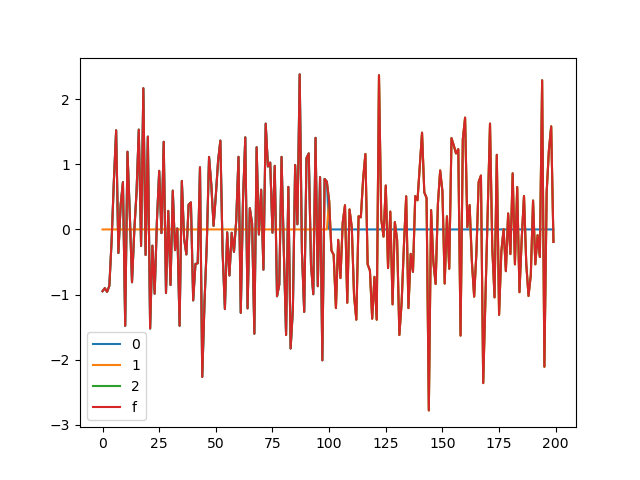

<IPython.core.display.Javascript object>


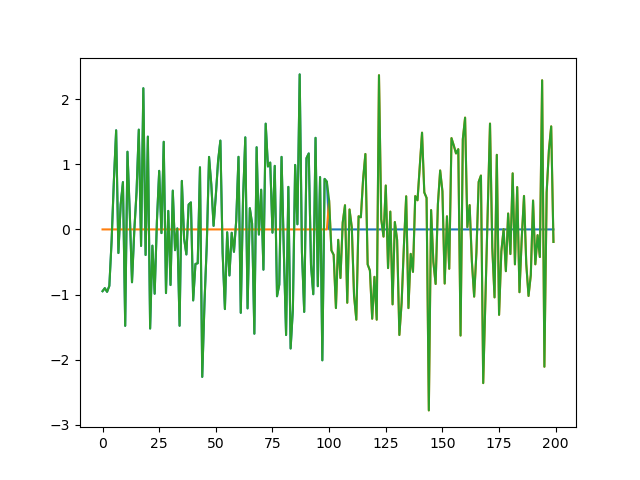

In [232]:
plt.figure()
for n in range(num_neurons):
    plt.plot(X[n,:], label=n)
plt.plot(f, label='f')
plt.legend()

plt.figure()
plt.plot(f0, label='f0')
plt.plot(f1, label='f1')
plt.plot(f, label='f')

In [226]:
# w0 = 1*np.ones(N0)
# w1 = -0.1*np.ones(N1)
# sample_weight = np.concatenate((w0, w1))

In [248]:
f1_ = copy.copy(f1)
f1_[0:N0] = -0.1

In [249]:
#X: n_samples X n_features
#y: n_samplesa

# clf = LinearRegression().fit(X.T, f1_)

clf = Ridge(alpha=1e-1).fit(X.T, f1_)#, sample_weight=sample_weight)
# clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 5, 1e1]).fit(X.T, f1) # , sample_weight=sample_weight)
clf.score(X[:,N0:].T, f1_[N0:])

0.9973208659135054

In [250]:
clf.coef_

array([-0.33248338,  0.6643329 ,  0.33184952])

In [58]:
# clf = Ridge(alpha=C, max_iter=max_iter).fit(D['x', tt], D['y', tt])

In [14]:
# plt.figure()
# plt.hist(f1)